In [1]:
from importlib import reload
import os
import json
import board
import snake
reload(board)
reload(snake)
from board import GeneralBoard
from snake import Snake, ControllableSnake

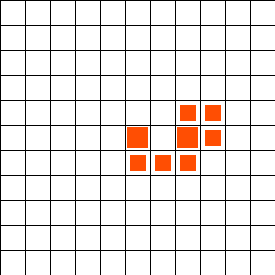

In [9]:
#sample_game_state = {"game": {"id": "d76a05f5-e961-4523-807f-2d5e5825cd95", "ruleset": {"name": "standard", "version": "cli", "settings": {"foodSpawnChance": 15, "minimumFood": 1, "hazardDamagePerTurn": 14, "hazardMap": "", "hazardMapAuthor": "", "royale": {"shrinkEveryNTurns": 25}, "squad": {"allowBodyCollisions": False, "sharedElimination": False, "sharedHealth": False, "sharedLength": False}}}, "map": "standard", "timeout": 500, "source": ""}, "turn": 7, "board": {"height": 11, "width": 11, "snakes": [{"id": "f5397cbd-611f-47bc-96fd-7ca72e543bef", "name": "Team 1 Snake 1", "latency": "8", "health": 100, "body": [{"x": 4, "y": 1}, {"x": 4, "y": 2}, {"x": 3, "y": 2}, {"x": 2, "y": 2}], "head": {"x": 4, "y": 1}, "length": 4, "shout": "", "squad": "", "customizations": {"color": "#ff4e03", "head": "default", "tail": "default"}}, {"id": "8e15dfcc-fe37-4484-a946-62ff1430f6ac", "name": "Team 1 Snake 2", "latency": "8", "health": 95, "body": [{"x": 5, "y": 8}, {"x": 4, "y": 8}, {"x": 3, "y": 8}, {"x": 2, "y": 8}], "head": {"x": 5, "y": 8}, "length": 4, "shout": "", "squad": "", "customizations": {"color": "#ff4e03", "head": "default", "tail": "default"}}], "food": [{"x": 5, "y": 5}, {"x": 10, "y": 10}], "hazards": []}, "you": {"id": "f5397cbd-611f-47bc-96fd-7ca72e543bef", "name": "Team 1 Snake 1", "latency": "0", "health": 100, "body": [{"x": 4, "y": 1}, {"x": 4, "y": 2}, {"x": 3, "y": 2}, {"x": 2, "y": 2}, {"x": 2, "y": 2}], "head": {"x": 4, "y": 1}, "length": 5, "shout": "", "squad": "", "customizations": {"color": "#ff4e03", "head": "default", "tail": "default"}}}
#sample_game_state = {"game": {"id": "c14280c0-d8c9-4cae-b141-3cd2f8ddc9ba", "ruleset": {"name": "standard", "version": "cli", "settings": {"foodSpawnChance": 15, "minimumFood": 1, "hazardDamagePerTurn": 14, "hazardMap": "", "hazardMapAuthor": "", "royale": {"shrinkEveryNTurns": 25}, "squad": {"allowBodyCollisions": False, "sharedElimination": False, "sharedHealth": False, "sharedLength": False}}}, "map": "standard", "timeout": 500, "source": ""}, "turn": 62, "board": {"height": 11, "width": 11, "snakes": [{"id": "9484f690-7815-4b8a-ad76-b85d4be4bfa2", "name": "Team 1 Snake 1", "latency": "20", "health": 88, "body": [{"x": 0, "y": 2}, {"x": 1, "y": 2}, {"x": 1, "y": 3}, {"x": 1, "y": 4}, {"x": 1, "y": 5}, {"x": 1, "y": 6}, {"x": 1, "y": 7}, {"x": 1, "y": 8}, {"x": 1, "y": 9}, {"x": 2, "y": 9}, {"x": 3, "y": 9}, {"x": 4, "y": 9}], "head": {"x": 0, "y": 2}, "length": 12, "shout": "", "squad": "", "customizations": {"color": "#ff4e03", "head": "tiger-king", "tail": "tiger-tail"}}, {"id": "3adfaa85-ba3c-4396-bdf9-0eed7adba6ef", "name": "Team 1 Snake 2", "latency": "19", "health": 96, "body": [{"x": 2, "y": 0}, {"x": 2, "y": 1}, {"x": 3, "y": 1}, {"x": 4, "y": 1}, {"x": 5, "y": 1}, {"x": 5, "y": 2}, {"x": 4, "y": 2}, {"x": 3, "y": 2}, {"x": 3, "y": 3}, {"x": 4, "y": 3}], "head": {"x": 2, "y": 0}, "length": 10, "shout": "", "squad": "", "customizations": {"color": "#ff4e03", "head": "tiger-king", "tail": "tiger-tail"}}], "food": [{"x": 1, "y": 0}, {"x": 4, "y": 5}, {"x": 9, "y": 4}], "hazards": []}, "you": {"id": "3adfaa85-ba3c-4396-bdf9-0eed7adba6ef", "name": "Team 1 Snake 2", "latency": "0", "health": 96, "body": [{"x": 2, "y": 0}, {"x": 2, "y": 1}, {"x": 3, "y": 1}, {"x": 4, "y": 1}, {"x": 5, "y": 1}, {"x": 5, "y": 2}, {"x": 4, "y": 2}, {"x": 3, "y": 2}, {"x": 3, "y": 3}, {"x": 4, "y": 3}], "head": {"x": 2, "y": 0}, "length": 10, "shout": "", "squad": "", "customizations": {"color": "#ff4e03", "head": "tiger-king", "tail": "tiger-tail"}}}
path = "./game_states/2023-05-19_01 (b40)/10.json"
f = open(path, "r")
s = f.readline()
sample_game_state = json.loads(s)
board = GeneralBoard(11, 11)
snake1 = Snake(sample_game_state["board"]["snakes"][0]["id"])
snake2 = Snake(sample_game_state["board"]["snakes"][1]["id"])
snake1.place_on_board(board)
snake2.place_on_board(board)
snake1.update_state(sample_game_state["board"]["snakes"][0])
snake2.update_state(sample_game_state["board"]["snakes"][1])

board

11


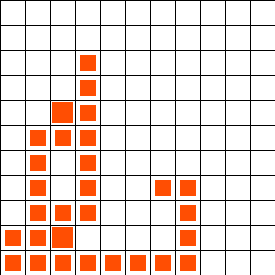

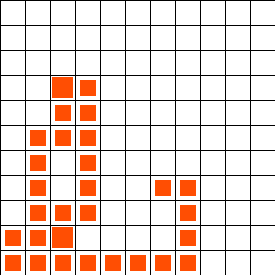

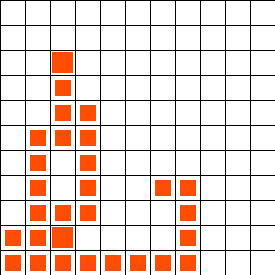

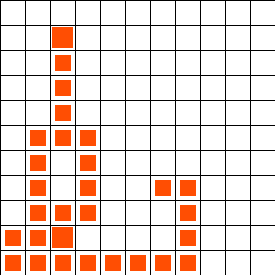

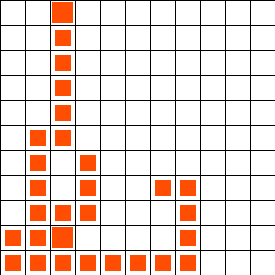

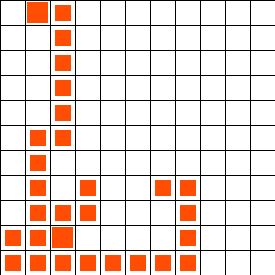

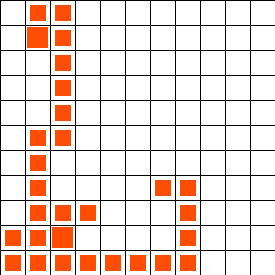

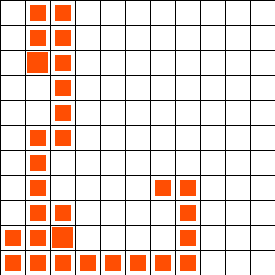

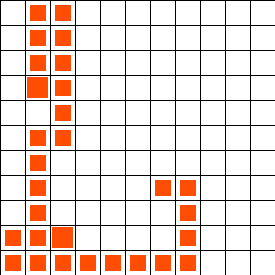

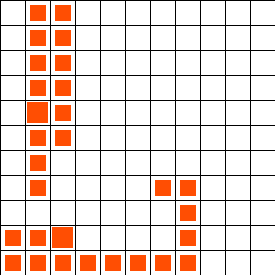

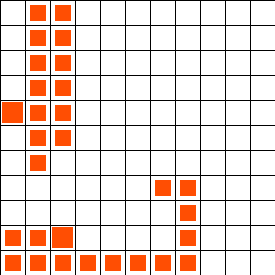

[None, None, None, None, None, None, None, None, None, None, None]

In [3]:
futures = snake2.alternative_futures("down")
print(len(futures))
[f._repr_png_() for f in futures]

In [4]:
future = snake1.alternative_futures("up")

In [5]:
[f._repr_png_() for f in future]

[]

In [6]:
def benchmark():
    import time
    start = time.time()
    subboards = board.get_possible_subboards()
    for subboard in subboards:
        next_subboards = subboard.get_possible_subboards()
        for next_subboard in next_subboards:
            next_subboard.get_possible_subboards()
    end = time.time()
    duration_ms = (end - start) * 1000
    print(duration_ms)

In [7]:
%prun benchmark()

399.56045150756836
 

         674414 function calls in 0.398 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    68244    0.122    0.000    0.159    0.000 board.py:9(__init__)
    34122    0.066    0.000    0.182    0.000 board.py:67(copy)
      282    0.039    0.000    0.106    0.000 board.py:135(create_cells)
   151956    0.034    0.000    0.034    0.000 board.py:26(set_snake)
    40923    0.028    0.000    0.046    0.000 board.py:52(clear_snake_info)
     3102    0.018    0.000    0.238    0.000 board.py:225(<listcomp>)
   102366    0.017    0.000    0.017    0.000 board.py:20(set_food)
   102366    0.016    0.000    0.016    0.000 board.py:23(set_hazard)
     1228    0.014    0.000    0.020    0.000 board.py:162(clear_snake)
      282    0.011    0.000    0.376    0.001 board.py:221(copy)
   106314    0.009    0.000    0.009    0.000 {method 'append' of 'list' objects}
    40923    0.009    0.000    0.009    0.000 board.py:33(set_closest_sn